<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/II.%20Introduccion_Ciencia_Datos/T4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Visualization using Python (Seaborn section)**
Full documentation in https://seaborn.pydata.org/

## ***A simple example***



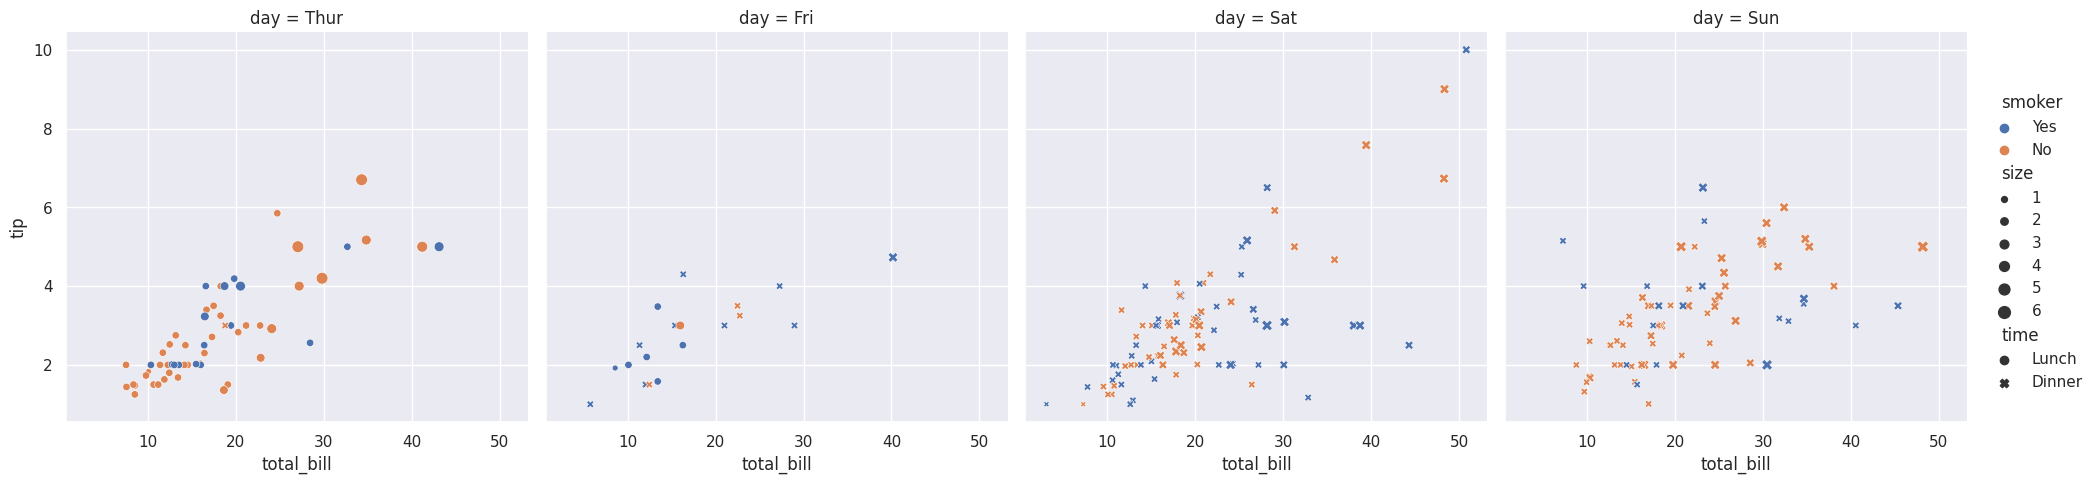

In [18]:
import seaborn as sns  # We import seaborn, which is the only library necessary for this simple example.

sns.set()               # We apply the default default seaborn theme, scaling, and color palette.

tips = sns.load_dataset("tips")    # We load one of the example datasets.

# print(tips)
# We draw a faceted scatter plot with multiple semantic variables.
sns.relplot(x="total_bill", y="tip", col="day",
            hue="smoker", style="time", size="size",
            data=tips);

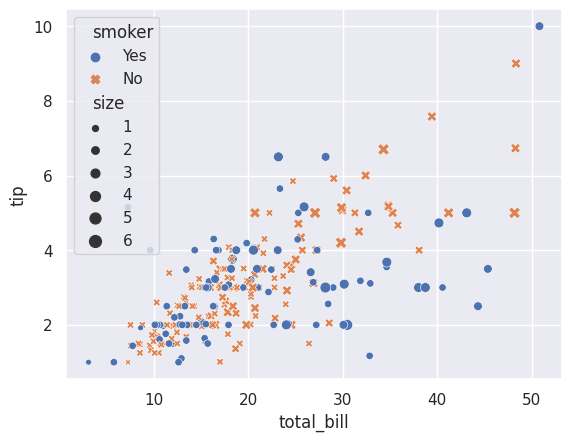

In [19]:
# We draw a faceted scatter plot with multiple semantic variables.
sns.scatterplot(x="total_bill", y="tip", #col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

In [20]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


##**Timeseries plot with error bands**


In [21]:
import seaborn as sns

sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

print(fmri)

     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]


<Axes: xlabel='timepoint', ylabel='signal'>

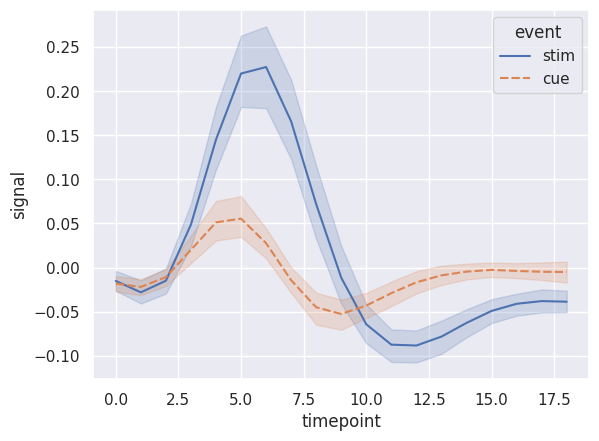

In [22]:
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="event", style="event",
             data=fmri)

##**Specialized categorical plots**

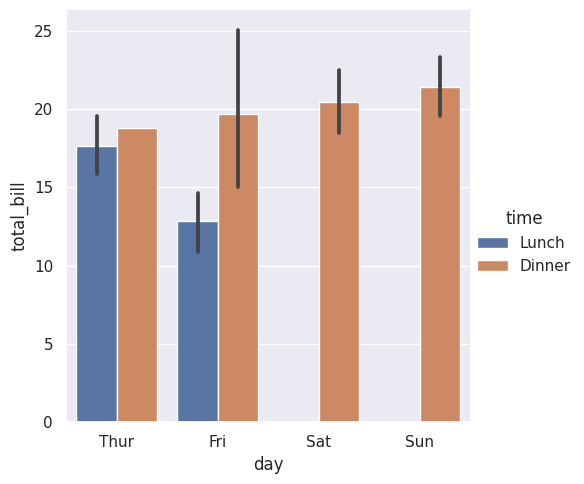

In [23]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
tips = sns.load_dataset("tips")

# scatter
#sns.catplot(x="day", y="total_bill", hue="time",
#            kind="swarm", data=tips);

# violin
#sns.catplot(x="day", y="total_bill", hue="time",
#            kind="violin", split=True, data=tips);

# bar
sns.catplot(x="day", y="total_bill", hue="time",
            kind="bar", data=tips);

##**Scatterplot Matrix**

In [24]:
import seaborn as sns
sns.set(style="ticks")
#sns.set_palette("Set1", n_colors=8, desat=.5)

df = sns.load_dataset("iris")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


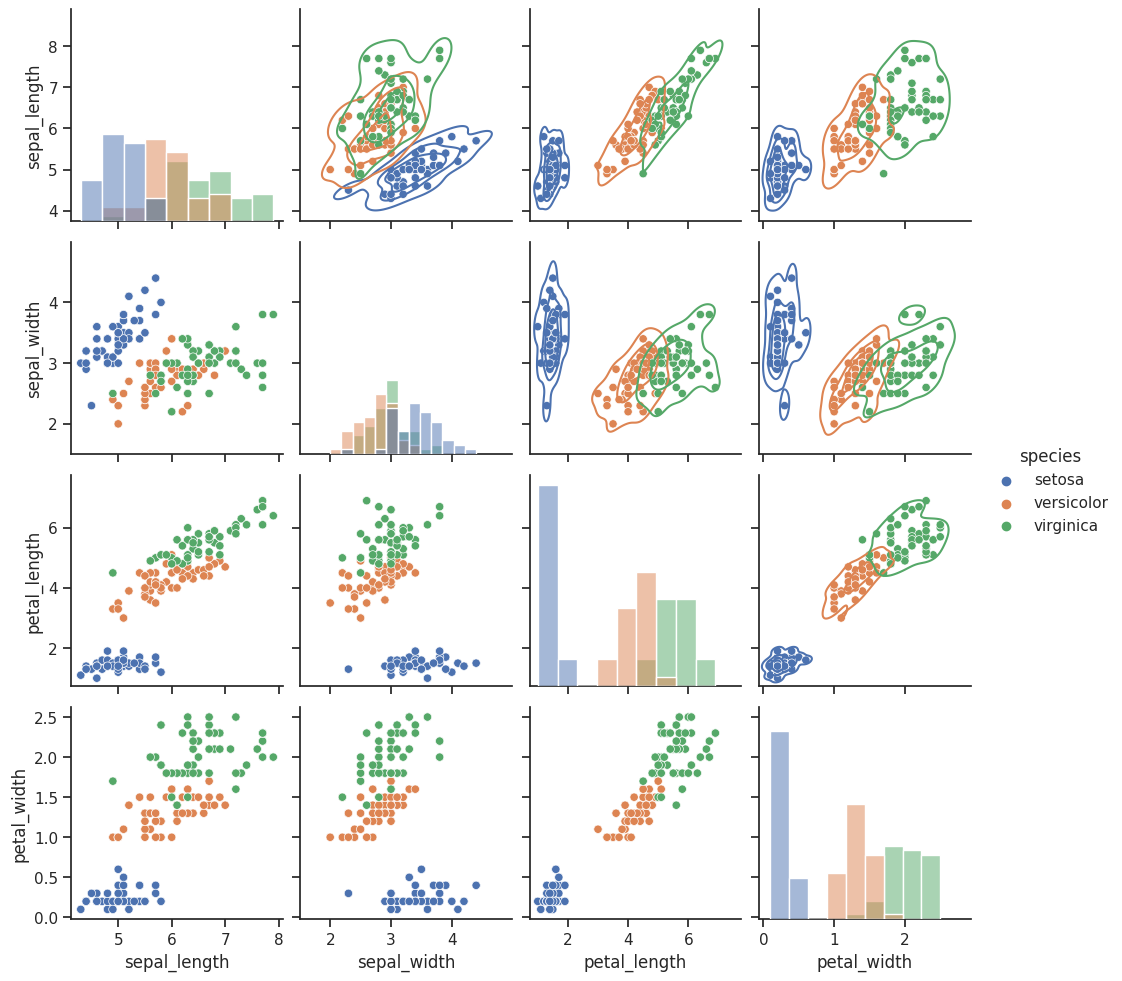

In [25]:
g = sns.pairplot(df, hue="species", diag_kind="hist", corner=False)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, levels=4, color=".2")

##**Grouped boxplots**

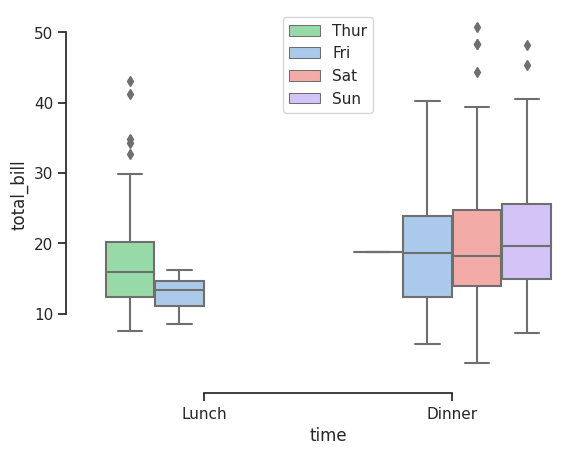

In [26]:
import matplotlib.pyplot as plt

sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="time", y="total_bill",
            hue="day", palette=["g", "b", "r", "m"],
            data=tips)
sns.despine(offset=10, trim=True)

#place legend in upper right of plot
plt.legend(loc='upper center')

##**Plotting a diagonal correlation matrix**

<ipython-input-27-7961e28b3d4d>:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

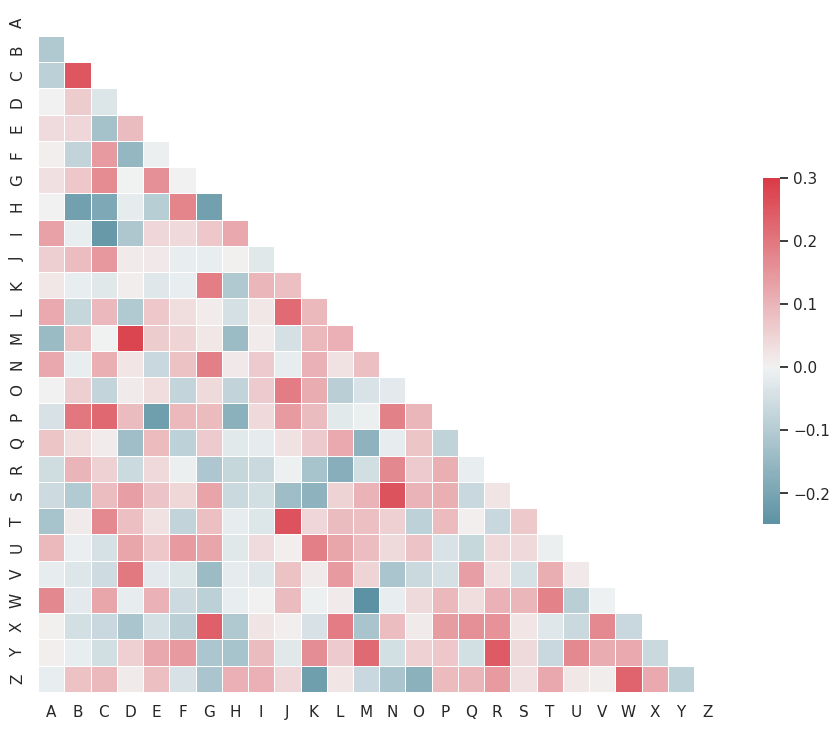

In [27]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##**Plotting on a large number of facets**

    position  step  walk
0          0     0     0
1          1     1     0
2          1     2     0
3          1     3     0
4          0     4     0
..       ...   ...   ...
95         0     0    19
96        -1     1    19
97         0     2    19
98         1     3    19
99         0     4    19

[100 rows x 3 columns]


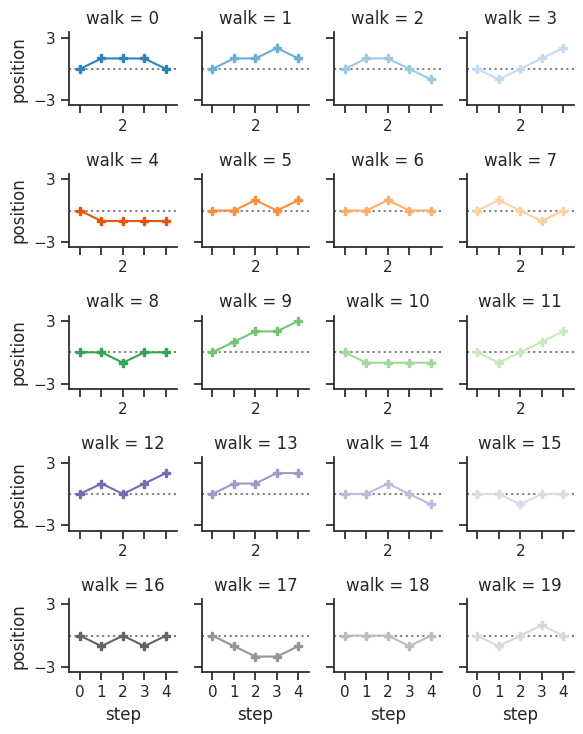

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])


print(df)

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="P")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [2]:
import pandas as pd


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df1=pd.read_csv("/content/drive/MyDrive/MAESTRIA CIENCIA DE DATOS UCSP/INTRODUCCION A LA CIENCIA DE DATOS/Spotify_Song_Attributes.csv")

In [4]:
df2=pd.read_csv("/content/drive/MyDrive/MAESTRIA CIENCIA DE DATOS UCSP/INTRODUCCION A LA CIENCIA DE DATOS/shopping_trends_updated.csv")

In [36]:
df2.shape

(3900, 18)

In [37]:
df2.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [38]:
df2.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [39]:
df2["Item Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [40]:
df2["Category"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [41]:
df2["Location"].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [42]:
df2["Season"].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [43]:
df2["Category"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [44]:
df2.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [48]:
df2.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


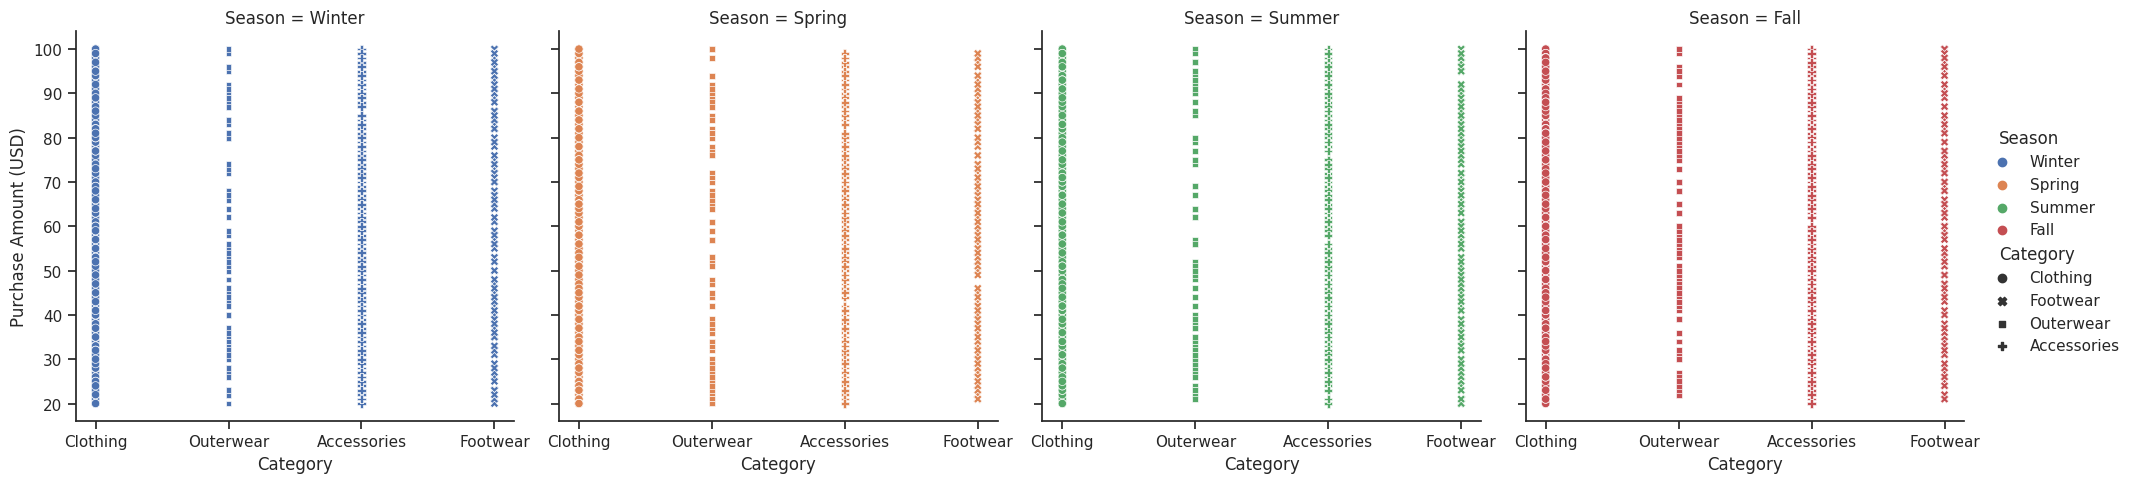

In [46]:
sns.relplot(x="Category", y="Purchase Amount (USD)", col="Season",
            hue="Season", style="Category",
            data=df2)

In [ ]:
seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)

**La categorica Clothing es la mas vendida**

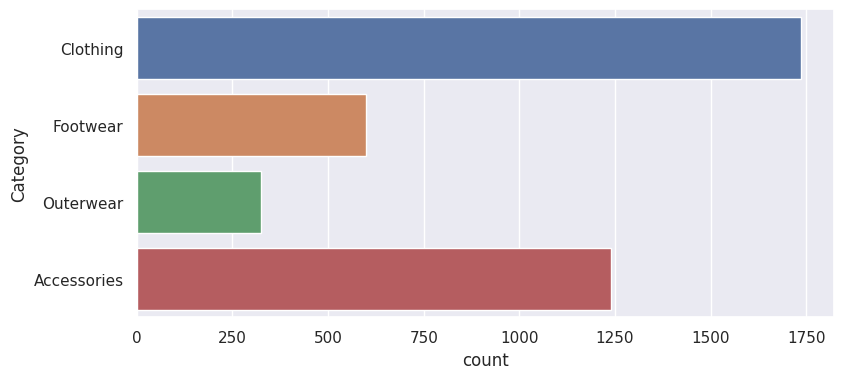

In [85]:

sns.set(rc={"figure.figsize":(9, 4)})
sns.countplot(data=df2, y="Category");

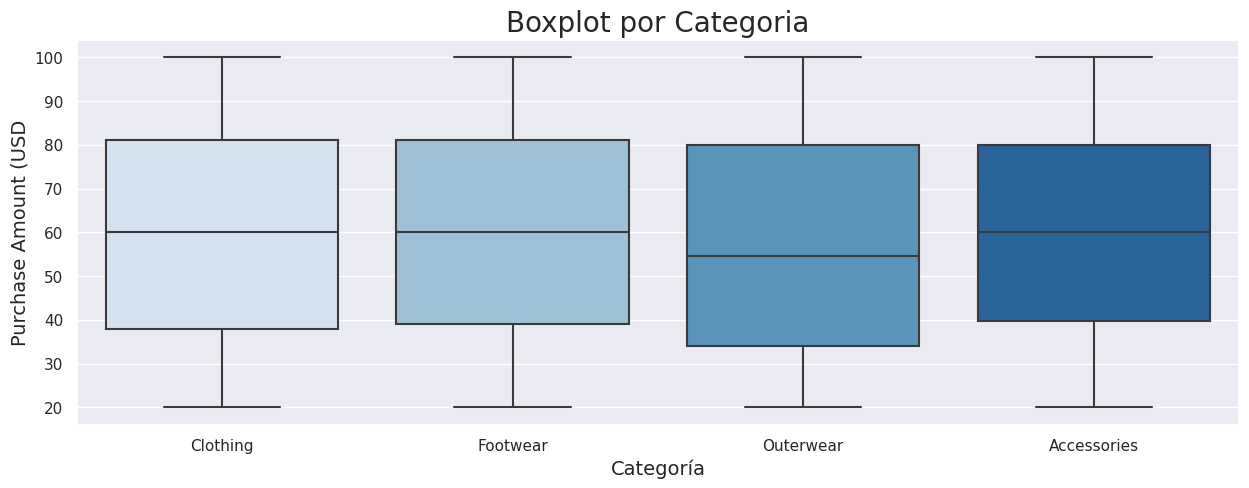

In [83]:
plt.figure(figsize=(15,5))
boxplot_price_make=sns.boxplot( y=df2["Purchase Amount (USD)"], x=df2["Category"], palette="Blues" );
boxplot_price_make.axes.set_title("Boxplot por Categoria",fontsize=20)
boxplot_price_make.set_xlabel("Categoría",fontsize=14)
boxplot_price_make.set_ylabel("Purchase Amount (USD",fontsize=14)
plt.show()

<Axes: xlabel='count', ylabel='Location'>

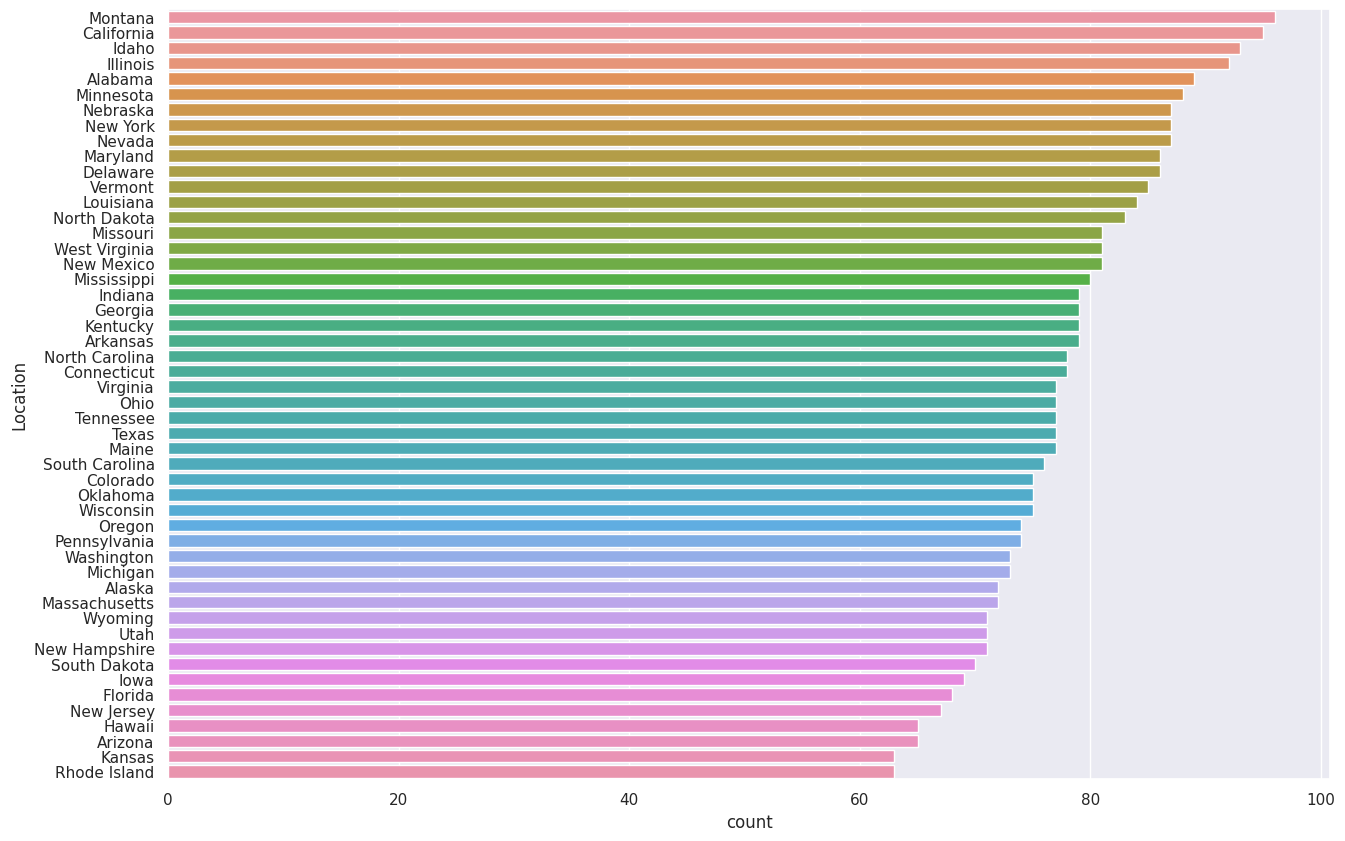

In [82]:
#Se puede cambiar el tamaño de las figuras
sns.set(rc={"figure.figsize":(15, 10)})
sns.countplot(data=df2, y="Location",order=df2["Location"].value_counts().index)

In [ ]:
df